### Lets Grow More (VIP)

#### Data Science Internship

#### Author - KANCHAN ARVIND CHORGE  ( Batch - October 2021)

#### Iris Flower Classification ML Project



Objective - To create a machine learning model that can learn from the measurements of those species are already known, so that we can predict the species for the new irises.

#### Importing libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
#%matplotlib imline

#### Loading Dataset 

In [2]:
iris_data=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [3]:
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
iris_data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [5]:
columns=['sepal_lenght','sepal_width','petal_lenght','petal_width','species']

In [6]:
iris_data.columns=columns

In [7]:
iris_data.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#### Structure of data

In [8]:
iris_data.shape

(149, 5)

In [9]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_lenght  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
iris_data.describe()

,sepal_lenght,sepal_width,petal_lenght,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# To check if there are missing values present in data set
iris_data.isnull().sum()

sepal_lenght    0
sepal_width     0
petal_lenght    0
petal_width     0
species         0
dtype: int64

#### Visualization of Data


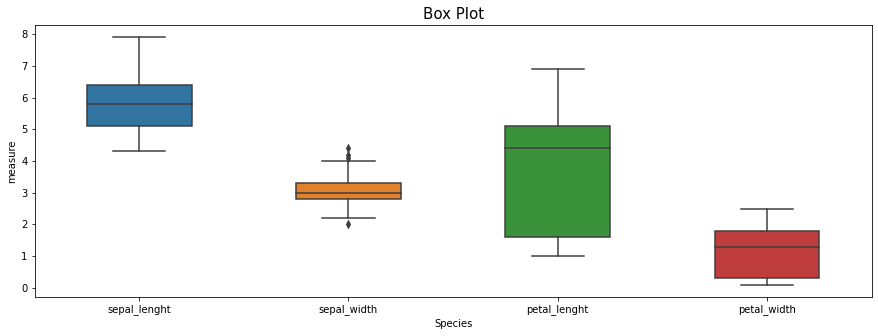

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(data=iris_data,width=0.5,fliersize=5)
plt.xlabel('Species',fontsize=10)
plt.ylabel('measure',fontsize=10)
plt.title('Box Plot',fontsize=15)
plt.show()

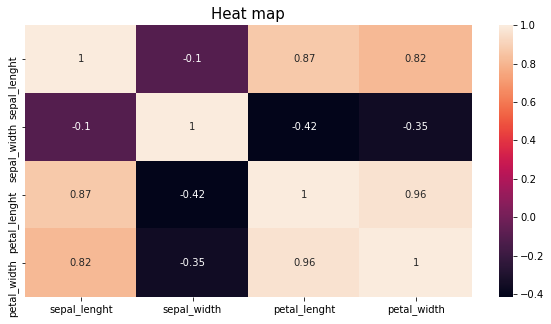

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(iris_data.corr(), annot=True)
plt.title('Heat map',fontsize=15)
plt.show()

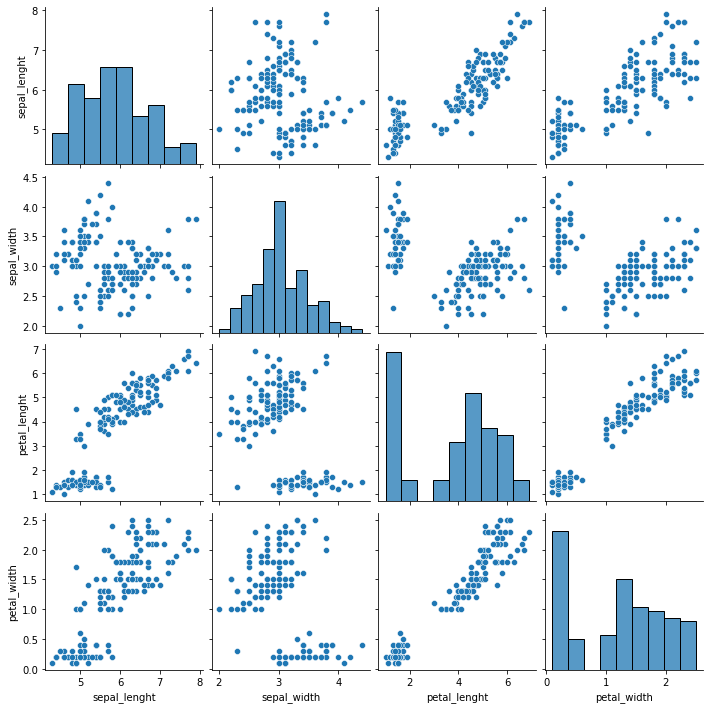

In [14]:
sns.pairplot(iris_data)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

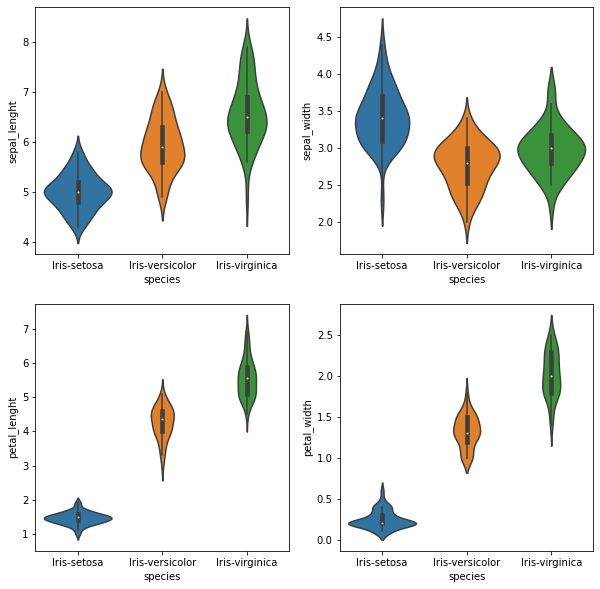

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_lenght',data=iris_data,pakette='rainbow')
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=iris_data,pakette='rainbow')
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_lenght',data=iris_data,pakette='rainbow')
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=iris_data,pakette='rainbow')


#### Spliting of data into train and test

In [17]:
x_train, x_test, y_train, y_test=train_test_split(iris_data.drop('species',axis=1),
                                                 iris_data['species'],test_size=0.30)

In [25]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

104
45
104
45


#### Building model

### 1. Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

model_1=LogisticRegression()
model_1.fit(x_train,y_train)

LogisticRegression()

In [32]:
predict_1=model_1.predict(x_test)

In [33]:
y_test_pred_1=model_1.predict(x_test)
y_train_pred_1=model_1.predict(x_train)

In [38]:
print("Training Accuracy : ",accuracy_score(y_train,y_train_pred_1)*100)
print("Test Accuracy     : ",accuracy_score(y_train,y_train_pred_1)*100)

Training Accuracy :  97.11538461538461
Test Accuracy     :  97.11538461538461


### 2. KNeighborsClassifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [37]:
classifier= KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
classifier.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=9)

In [40]:
y_pred_2=classifier.predict(x_test)
print("Classification report : \n", classification_report(y_test,y_pred_2))
print("\n Confusion Matrix :\n",confusion_matrix(y_test,y_pred_2))
print("\n Accuracy score : ",accuracy_score(y_test,y_pred_2)*100)

Classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45


 Confusion Matrix :
 [[18  0  0]
 [ 0 12  1]
 [ 0  1 13]]

 Accuracy score :  95.55555555555556


### 3. Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,mean_squared_error

classifier_1=RandomForestClassifier()
classifier_1.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
y_pred_3=classifier_1.predict(x_test)

In [48]:
print("Classification report : \n", classification_report(y_test,y_pred_3))
print("\n Confusion Matrix :\n",confusion_matrix(y_test,y_pred_3))
print("\n Accuracy score : ",accuracy_score(y_test,y_pred_3)*100)

Classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45


 Confusion Matrix :
 [[18  0  0]
 [ 0 12  1]
 [ 0  0 14]]

 Accuracy score :  97.77777777777777


###  4. Decision Tree 

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
classifier_2=DecisionTreeClassifier(random_state=20)
classifier_2.fit(x_train,y_train)

DecisionTreeClassifier(random_state=20)

In [51]:
y_pred_4=classifier_2.predict(x_test)

In [52]:
print("Classification report : \n", classification_report(y_test,y_pred_4))
print("\n Confusion Matrix :\n",confusion_matrix(y_test,y_pred_4))
print("\n Accuracy score : ",accuracy_score(y_test,y_pred_4)*100)

Classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45


 Confusion Matrix :
 [[18  0  0]
 [ 0 12  1]
 [ 0  0 14]]

 Accuracy score :  97.77777777777777


#### Conclusion:
All the 4 model gives nearly similar accuracies 